In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"parimalmahata","key":"90b76789908258d827d399b003556427"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d gpiosenka/100-bird-species

 99% 1.36G/1.37G [00:13<00:00, 146MB/s]
100% 1.37G/1.37G [00:13<00:00, 110MB/s]


In [ ]:
!unzip 100-bird-species.zip

In [131]:
#imported libraries
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from PIL import Image

import torch
import torch.nn as nn
import torchvision
import torchvision.datasets as datasets
import torchvision.models as models
import torchvision.transforms as transforms

In [132]:
#checked for gpu
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [133]:
DIR_TRAIN = "/content/train"
DIR_TEST = "/content/test"
classes_train = os.listdir(DIR_TRAIN)
classes_test = os.listdir(DIR_TEST)
print(len(classes_train))
num_classes = len(classes_train)

225


In [134]:
print(sorted(classes_train))

['AFRICAN FIREFINCH', 'ALBATROSS', 'ALEXANDRINE PARAKEET', 'AMERICAN AVOCET', 'AMERICAN BITTERN', 'AMERICAN COOT', 'AMERICAN GOLDFINCH', 'AMERICAN KESTREL', 'AMERICAN PIPIT', 'AMERICAN REDSTART', 'ANHINGA', 'ANNAS HUMMINGBIRD', 'ANTBIRD', 'ARARIPE MANAKIN', 'ASIAN CRESTED IBIS', 'BALD EAGLE', 'BALI STARLING', 'BALTIMORE ORIOLE', 'BANANAQUIT', 'BAR-TAILED GODWIT', 'BARN OWL', 'BARN SWALLOW', 'BARRED PUFFBIRD', 'BAY-BREASTED WARBLER', 'BEARDED BARBET', 'BELTED KINGFISHER', 'BIRD OF PARADISE', 'BLACK FRANCOLIN', 'BLACK SKIMMER', 'BLACK SWAN', 'BLACK THROATED WARBLER', 'BLACK VULTURE', 'BLACK-CAPPED CHICKADEE', 'BLACK-NECKED GREBE', 'BLACK-THROATED SPARROW', 'BLACKBURNIAM WARBLER', 'BLUE GROUSE', 'BLUE HERON', 'BOBOLINK', 'BROWN NOODY', 'BROWN THRASHER', 'CACTUS WREN', 'CALIFORNIA CONDOR', 'CALIFORNIA GULL', 'CALIFORNIA QUAIL', 'CANARY', 'CAPE MAY WARBLER', 'CAPUCHINBIRD', 'CARMINE BEE-EATER', 'CASPIAN TERN', 'CASSOWARY', 'CHARA DE COLLAR', 'CHIPPING SPARROW', 'CHUKAR PARTRIDGE', 'CINNAMON

In [135]:
#resizing image as per reqyirements of resnet
from torchvision import transforms
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

In [136]:
batch_size = 16
trainset = torchvision.datasets.ImageFolder(root='/content/train', transform=transform)
testset = torchvision.datasets.ImageFolder(root='/content/test', transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=True)

In [137]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(images[0].shape)
print(labels.shape)

torch.Size([16, 3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([16])


In [138]:
model = torchvision.models.resnet50(pretrained=True, progress=True)

In [139]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [140]:
for p in model.parameters():
  p.requires_grad = False

In [141]:
in_features = model.fc.in_features
model.fc = nn.Linear(in_features, num_classes)

In [142]:
for param in model.parameters():
    if param.requires_grad:
        print(param.shape)

torch.Size([225, 2048])
torch.Size([225])


In [143]:
model = model.to(device)

In [144]:
loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD(model.parameters(), lr=0.01)

In [145]:
def evaluation(dataloader,model):
    total, correct = 0, 0
    model.eval()
    for data in dataloader:
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

Min loss 2.43
Iteration: 0/1958, Loss: 2.43
Min loss 2.25
Min loss 1.82
Min loss 1.73
Min loss 1.65
Min loss 1.52
Iteration: 100/1958, Loss: 1.78
Min loss 1.49
Min loss 1.45
Iteration: 200/1958, Loss: 2.16
Min loss 1.38
Iteration: 300/1958, Loss: 2.27
Min loss 1.32
Iteration: 400/1958, Loss: 1.69
Min loss 1.29
Min loss 1.27
Iteration: 500/1958, Loss: 2.60
Min loss 1.22
Iteration: 600/1958, Loss: 2.06
Iteration: 700/1958, Loss: 1.83
Min loss 1.18
Min loss 1.14
Iteration: 800/1958, Loss: 1.50
Min loss 1.12
Iteration: 900/1958, Loss: 1.97
Min loss 1.11
Iteration: 1000/1958, Loss: 1.73
Min loss 1.03
Iteration: 1100/1958, Loss: 1.67
Min loss 0.95
Iteration: 1200/1958, Loss: 1.87
Min loss 0.76
Iteration: 1300/1958, Loss: 1.74
Iteration: 1400/1958, Loss: 1.16
Iteration: 1500/1958, Loss: 1.61
Iteration: 1600/1958, Loss: 1.36
Iteration: 1700/1958, Loss: 1.34
Iteration: 1800/1958, Loss: 1.22
Min loss 0.75
Iteration: 1900/1958, Loss: 1.80
Epoch: 0/2, Test acc: 89.42, Train acc: 85.32
Iteration: 0

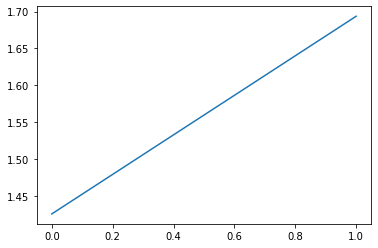

In [147]:
loss_epoch_arr = []
max_epochs = 4

min_loss = 1000

n_iters = np.ceil(31316/batch_size)

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
        if min_loss > loss.item():
            min_loss = loss.item()
            best_model = copy.deepcopy(model.state_dict())
            print('Min loss %0.2f' % min_loss)
        
        if i % 100 == 0:
            print('Iteration: %d/%d, Loss: %0.2f' % (i, n_iters, loss.item()))
            
        del inputs, labels, outputs
        torch.cuda.empty_cache()
        
    loss_epoch_arr.append(loss.item())
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (    
        epoch, max_epochs, 
        evaluation(testloader,model), evaluation(trainloader,model)))
    
    
plt.plot(loss_epoch_arr)
plt.show()

In [148]:
classes = ['AFRICAN FIREFINCH', 'ALBATROSS', 'ALEXANDRINE PARAKEET', 'AMERICAN AVOCET', 'AMERICAN BITTERN', 'AMERICAN COOT', 'AMERICAN GOLDFINCH', 'AMERICAN KESTREL', 'AMERICAN PIPIT', 'AMERICAN REDSTART', 'ANHINGA', 'ANNAS HUMMINGBIRD', 'ANTBIRD', 'ARARIPE MANAKIN', 'ASIAN CRESTED IBIS', 'BALD EAGLE', 'BALI STARLING', 'BALTIMORE ORIOLE', 'BANANAQUIT', 'BAR-TAILED GODWIT', 'BARN OWL', 'BARN SWALLOW', 'BARRED PUFFBIRD', 'BAY-BREASTED WARBLER', 'BEARDED BARBET', 'BELTED KINGFISHER', 'BIRD OF PARADISE', 'BLACK FRANCOLIN', 'BLACK SKIMMER', 'BLACK SWAN', 'BLACK THROATED WARBLER', 'BLACK VULTURE', 'BLACK-CAPPED CHICKADEE', 'BLACK-NECKED GREBE', 'BLACK-THROATED SPARROW', 'BLACKBURNIAM WARBLER', 'BLUE GROUSE', 'BLUE HERON', 'BOBOLINK', 'BROWN NOODY', 'BROWN THRASHER', 'CACTUS WREN', 'CALIFORNIA CONDOR', 'CALIFORNIA GULL', 'CALIFORNIA QUAIL', 'CANARY', 'CAPE MAY WARBLER', 'CAPUCHINBIRD', 'CARMINE BEE-EATER', 'CASPIAN TERN', 'CASSOWARY', 'CHARA DE COLLAR', 'CHIPPING SPARROW', 'CHUKAR PARTRIDGE', 'CINNAMON TEAL', 'COCK OF THE  ROCK', 'COCKATOO', 'COMMON GRACKLE', 'COMMON HOUSE MARTIN', 'COMMON LOON', 'COMMON POORWILL', 'COMMON STARLING', 'COUCHS KINGBIRD', 'CRESTED AUKLET', 'CRESTED CARACARA', 'CROW', 'CROWNED PIGEON', 'CUBAN TODY', 'CURL CRESTED ARACURI', 'D-ARNAUDS BARBET', 'DARK EYED JUNCO', 'DOWNY WOODPECKER', 'EASTERN BLUEBIRD', 'EASTERN MEADOWLARK', 'EASTERN ROSELLA', 'EASTERN TOWEE', 'ELEGANT TROGON', 'ELLIOTS  PHEASANT', 'EMPEROR PENGUIN', 'EMU', 'EURASIAN MAGPIE', 'EVENING GROSBEAK', 'FLAME TANAGER', 'FLAMINGO', 'FRIGATE', 'GAMBELS QUAIL', 'GILA WOODPECKER', 'GILDED FLICKER', 'GLOSSY IBIS', 'GOLD WING WARBLER', 'GOLDEN CHEEKED WARBLER', 'GOLDEN CHLOROPHONIA', 'GOLDEN EAGLE', 'GOLDEN PHEASANT', 'GOLDEN PIPIT', 'GOULDIAN FINCH', 'GRAY CATBIRD', 'GRAY PARTRIDGE', 'GREEN JAY', 'GREY PLOVER', 'GUINEAFOWL', 'GYRFALCON', 'HARPY EAGLE', 'HAWAIIAN GOOSE', 'HOODED MERGANSER', 'HOOPOES', 'HORNBILL', 'HORNED GUAN', 'HORNED SUNGEM', 'HOUSE FINCH', 'HOUSE SPARROW', 'IMPERIAL SHAQ', 'INCA TERN', 'INDIAN BUSTARD', 'INDIGO BUNTING', 'JABIRU', 'JAVAN MAGPIE', 'KAKAPO', 'KILLDEAR', 'KING VULTURE', 'KIWI', 'KOOKABURRA', 'LARK BUNTING', 'LEARS MACAW', 'LILAC ROLLER', 'LONG-EARED OWL', 'MALABAR HORNBILL', 'MALACHITE KINGFISHER', 'MALEO', 'MALLARD DUCK', 'MANDRIN DUCK', 'MARABOU STORK', 'MASKED BOOBY', 'MIKADO  PHEASANT', 'MOURNING DOVE', 'MYNA', 'NICOBAR PIGEON', 'NORTHERN CARDINAL', 'NORTHERN FLICKER', 'NORTHERN GANNET', 'NORTHERN GOSHAWK', 'NORTHERN JACANA', 'NORTHERN MOCKINGBIRD', 'NORTHERN PARULA', 'NORTHERN RED BISHOP', 'OCELLATED TURKEY', 'OKINAWA RAIL', 'OSPREY', 'OSTRICH', 'PAINTED BUNTIG', 'PALILA', 'PARADISE TANAGER', 'PARUS MAJOR', 'PEACOCK', 'PELICAN', 'PEREGRINE FALCON', 'PHILIPPINE EAGLE', 'PINK ROBIN', 'PUFFIN', 'PURPLE FINCH', 'PURPLE GALLINULE', 'PURPLE MARTIN', 'PURPLE SWAMPHEN', 'QUETZAL', 'RAINBOW LORIKEET', 'RAZORBILL', 'RED FACED CORMORANT', 'RED FACED WARBLER', 'RED HEADED DUCK', 'RED HEADED WOODPECKER', 'RED HONEY CREEPER', 'RED THROATED BEE EATER', 'RED WINGED BLACKBIRD', 'RED WISKERED BULBUL', 'RING-NECKED PHEASANT', 'ROADRUNNER', 'ROBIN', 'ROCK DOVE', 'ROSY FACED LOVEBIRD', 'ROUGH LEG BUZZARD', 'RUBY THROATED HUMMINGBIRD', 'RUFOUS KINGFISHER', 'RUFUOS MOTMOT', 'SAND MARTIN', 'SCARLET IBIS', 'SCARLET MACAW', 'SHOEBILL', 'SMITHS LONGSPUR', 'SNOWY EGRET', 'SNOWY OWL', 'SORA', 'SPANGLED COTINGA', 'SPLENDID WREN', 'SPOON BILED SANDPIPER', 'SPOONBILL', 'STEAMER DUCK', 'STORK BILLED KINGFISHER', 'STRAWBERRY FINCH', 'STRIPPED SWALLOW', 'SUPERB STARLING', 'TAIWAN MAGPIE', 'TAKAHE', 'TASMANIAN HEN', 'TEAL DUCK', 'TIT MOUSE', 'TOUCHAN', 'TOWNSENDS WARBLER', 'TREE SWALLOW', 'TRUMPTER SWAN', 'TURKEY VULTURE', 'TURQUOISE MOTMOT', 'VARIED THRUSH', 'VENEZUELIAN TROUPIAL', 'VERMILION FLYCATHER', 'VIOLET GREEN SWALLOW', 'WATTLED CURASSOW', 'WHIMBREL', 'WHITE CHEEKED TURACO', 'WHITE NECKED RAVEN', 'WHITE TAILED TROPIC', 'WILD TURKEY', 'WILSONS BIRD OF PARADISE', 'WOOD DUCK', 'YELLOW CACIQUE', 'YELLOW HEADED BLACKBIRD']

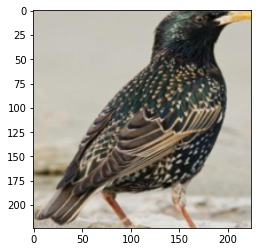

Ground_truth-
COMMON STARLING
Prediction - 
COMMON STARLING


In [155]:
dataiter = iter(testloader)
images, labels = dataiter.next()
def imshow(img):
    npimg = img.numpy()/2 + 0.5
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
imshow(torchvision.utils.make_grid(images[:1]))
print("Ground_truth-")
print(' '.join(classes[labels[j]] for j in range(1)))
images = images.to(device)
out = model(images)
max_values, pred_class = torch.max(out.data, 1)
print("Prediction - ")
print(' '.join(classes[pred_class[j]] for j in range(1)))

In [150]:
# Process our image
def process_image(image_path):
    # Load Image
    img = Image.open(image_path)
    
    # Get the dimensions of the image
    width, height = img.size
    
    # Resize by keeping the aspect ratio, but changing the dimension
    # so the shortest size is 255px
    img = img.resize((255, int(255*(height/width))) if width < height else (int(255*(width/height)), 255))
    
    # Get the dimensions of the new image size
    width, height = img.size
    
    # Set the coordinates to do a center crop of 224 x 224
    left = (width - 224)/2
    top = (height - 224)/2
    right = (width + 224)/2
    bottom = (height + 224)/2
    img = img.crop((left, top, right, bottom))
    
    # Turn image into numpy array
    img = np.array(img)
    
    # Make the color channel dimension first instead of last
    img = img.transpose((2, 0, 1))
    
    # Make all values between 0 and 1
    img = img/255
    
    # Normalize based on the preset mean and standard deviation
    img[0] = (img[0] - 0.5)/0.5
    img[1] = (img[1] -0.5)/0.5
    img[2] = (img[2] - 0.5)/0.5
    
    # Add a fourth dimension to the beginning to indicate batch size
    img = img[np.newaxis,:]
    
    # Turn into a torch tensor
    image = torch.from_numpy(img)
    image = image.float()
    return image
    

In [151]:
# Using our model to predict the label
def predict(image, model):
    # Pass the image through our model
    image = image.to(device)
    output = model(image)
    
    # Reverse the log function in our output
    output = torch.exp(output)
    
    # Get the top predicted class, and the output percentage for
    # that class
    probs, classes = output.topk(1, dim=1)
    return probs.item(), classes.item()

In [152]:
# Show Image
def show_image(image):
    # Convert image to numpy
    image = image.numpy()
    
    # Un-normalize the image
    image[0] = image[0] * 0.226 + 0.445
    
    # Print the image
    fig = plt.figure(figsize=(25, 4))
    plt.imshow(np.transpose(image[0], (1, 2, 0)))

1
ALBATROSS


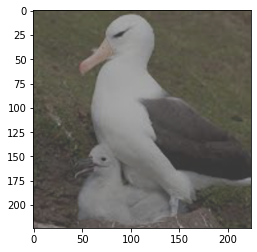

In [153]:
# Process Image
image = process_image("/content/download (2).jfif")
# Give image to model to predict output
top_prob, top_class = predict(image, model)
print(top_class)
# Show the image
show_image(image)
print(classes[top_class])

In [156]:
checkpoint = {'model': model,
          'state_dict': model.state_dict(),
          'optimizer' : opt.state_dict()}

torch.save(checkpoint, 'bird_species.pth')